In [53]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

import functions as fn

In [54]:
# Read in the list of teams
teams = pd.read_csv('DataFiles/Teams.csv')
seasons_data = pd.read_csv('DataFiles/RegularSeasonDetailedResults.csv')
file_list = {}
years = ['18','17','16','15','14','13','12','11','10','09','08','07','06','05','04','03','02','01','00']

# Read in the data files from sports-reference.com
for s in years:
    filepath = ('WebData/ratings_' + s + '.csv')
    data = pd.read_csv(filepath).drop(['Unnamed: 3', 'Unnamed: 9', 'Unnamed: 11'], axis=1)
    # We need only the school name and the rank
    data = data[['Rk', 'School']].dropna()
    data = data[(data['Rk']).str.isnumeric()]
    file_list[s] = data

In [55]:
# Extract the dataframes from the list
df_18 = file_list['18']
df_17 = file_list['17']
df_16 = file_list['16']
df_15 = file_list['15']
df_14 = file_list['14']
df_13 = file_list['13']
df_12 = file_list['12']
df_11 = file_list['11']
df_10 = file_list['10']
df_09 = file_list['09']
df_08 = file_list['08']
df_07 = file_list['07']
df_06 = file_list['06']
df_05 = file_list['05']
df_04 = file_list['04']
df_03 = file_list['03']
df_02 = file_list['02']
df_01 = file_list['01']
df_00 = file_list['00']
# Rename the columns
df_18.columns = ['2018', 'School']
df_17.columns = ['2017', 'School']
df_16.columns = ['2016', 'School']
df_15.columns = ['2015', 'School']
df_14.columns = ['2014', 'School']
df_13.columns = ['2013', 'School']
df_12.columns = ['2012', 'School']
df_11.columns = ['2011', 'School']
df_10.columns = ['2010', 'School']
df_09.columns = ['2009', 'School']
df_08.columns = ['2008', 'School']
df_07.columns = ['2007', 'School']
df_06.columns = ['2006', 'School']
df_05.columns = ['2005', 'School']
df_04.columns = ['2004', 'School']
df_03.columns = ['2003', 'School']
df_02.columns = ['2002', 'School']
df_01.columns = ['2001', 'School']
df_00.columns = ['2000', 'School']

In [56]:
# Merge the dataframes so that we can look at the correlation
from functools import reduce
data_frames = [df_18, df_17, df_16, df_15, df_14, df_13, df_12, df_11, df_10, df_09, df_08, 
               df_07, df_06, df_05, df_04, df_03, df_02, df_01, df_00]

team_ranks_df = reduce(lambda left, right: pd.merge(left, right, on=['School'], how='outer'), data_frames)

team_ranks_df = team_ranks_df.dropna()
team_ranks_df.head()

,2018,School,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,1,Villanova,5,1,5,9,51,71,23,17,14,47,19,6,13,50,59,50,75,72
1,2,Duke,9,12,2,6,4,12,2,1,6,5,11,2,3,1,6,1,1,2
2,3,Purdue,15,9,34,71,64,24,8,13,18,31,27,145,87,51,22,67,28,24
3,4,Michigan State,42,4,17,7,12,5,34,23,13,16,17,33,7,38,19,23,4,3
4,5,Virginia,13,5,6,14,41,34,92,68,85,76,46,83,72,58,72,36,12,40


In [57]:
# Convert the rankings to integers
for col in team_ranks_df.columns:
    if str(col) != 'School':
        team_ranks_df[col] = team_ranks_df[col].astype(int)

In [58]:
# Look at the correlation between rankings for previous years
team_ranks_df.corr()

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
2018,1.000000,0.853775,0.800106,0.776116,0.765266,0.717467,0.727487,0.728042,0.751906,0.724500,0.727779,0.736601,0.737438,0.708929,0.712824,0.736065,0.695705,0.652188,0.671007
2017,0.853775,1.000000,0.863033,0.795524,0.772686,0.741753,0.724426,0.752835,0.746708,0.698141,0.704452,0.732693,0.740122,0.726953,0.726111,0.734160,0.688553,0.667658,0.649043
2016,0.800106,0.863033,1.000000,0.849893,0.812400,0.745885,0.732973,0.749500,0.749997,0.702338,0.695842,0.722092,0.715173,0.705352,0.718662,0.739638,0.709275,0.677314,0.663409
2015,0.776116,0.795524,0.849893,1.000000,0.859217,0.769311,0.722072,0.740969,0.749037,0.706894,0.676928,0.704059,0.721554,0.717427,0.701016,0.732806,0.691640,0.680328,0.678004
2014,0.765266,0.772686,0.812400,0.859217,1.000000,0.872070,0.797368,0.780917,0.779359,0.756674,0.710668,0.738638,0.754417,0.742758,0.745581,0.769304,0.719981,0.719876,0.697143
2013,0.717467,0.741753,0.745885,0.769311,0.872070,1.000000,0.836685,0.775221,0.755315,0.732308,0.708333,0.716791,0.716586,0.701213,0.688042,0.711870,0.654986,0.655685,0.643252
2012,0.727487,0.724426,0.732973,0.722072,0.797368,0.836685,1.000000,0.838347,0.774547,0.744379,0.711079,0.714381,0.717463,0.696717,0.705452,0.720682,0.683238,0.654667,0.652019
2011,0.728042,0.752835,0.749500,0.740969,0.780917,0.775221,0.838347,1.000000,0.866801,0.805962,0.746923,0.763414,0.723135,0.717803,0.741336,0.730977,0.696127,0.684109,0.666555
2010,0.751906,0.746708,0.749997,0.749037,0.779359,0.755315,0.774547,0.866801,1.000000,0.870194,0.785203,0.760530,0.746352,0.748245,0.757496,0.758366,0.707418,0.702970,0.690038
2009,0.724500,0.698141,0.702338,0.706894,0.756674,0.732308,0.744379,0.805962,0.870194,1.000000,0.845187,0.784516,0.734857,0.740135,0.750743,0.746506,0.716418,0.710437,0.679443


### We can see that the correlation with the 2018 rankings is slowly decreasing as we go back in time. For years prior to 2003, the correlation coefficient is less than 0.7.

In [59]:
team_ranks_df.to_csv('TeamRankings.csv')

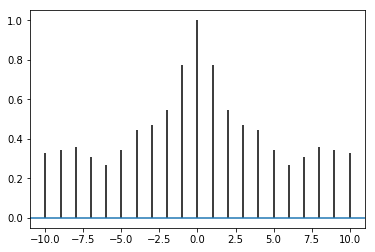

In [69]:
# Look at autocorrelation plots
d_corr = team_ranks_df.drop(['School'], axis=1).loc[0].values.astype(float)
plt.acorr(d_corr)
plt.show()

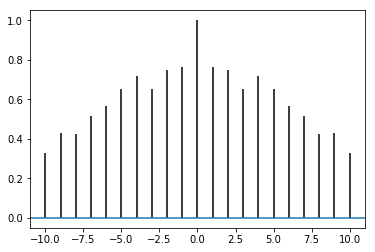

In [71]:
d_corr = team_ranks_df.drop(['School'], axis=1).loc[12].values.astype(float)
plt.acorr(d_corr)
plt.show()

In [72]:
# Look at the regular season data
seasons_data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [73]:
#Include only teams that have been Division I teams in the years included in the rankings data
teams = teams[teams.LastD1Season > 1999]

# Replace 'St' with 'State' in the TeamName column to correspond to the School column in the rest of the data
schools = []
for t in teams.TeamName:
    name = str(t)
    r_name = re.sub(' St', " State", name)
    schools.append(r_name)

teams.TeamName = schools
print(len(teams.TeamName.unique()))

357


In [74]:
# Create a dictionary with the team name and team id
teams_dict = {}

for i in teams.index:
    teams_dict[teams.TeamName[i]] = teams.TeamID[i]
    #teams_dict[teams.TeamID[i]] = teams.TeamName[i]
    
print(len(teams_dict))

357


In [75]:
# Create a list with the team ids
team_id_list = []

for i in team_ranks_df.index:
    s = str(team_ranks_df.School[i])
    if s in teams_dict:
        team_id = teams_dict[s]
        team_id_list.append(team_id)
    elif s not in teams_dict:
        team_id_list.append(np.nan)
        

team_ranks_df['TeamID'] = team_id_list

team_ranks_df = team_ranks_df.set_index('TeamID')
team_ranks_df.head()

,2018,School,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
TeamID,,,,,,,,,,,,,,,,,,,,
1437.0,1,Villanova,5,1,5,9,51,71,23,17,14,47,19,6,13,50,59,50,75,72
1181.0,2,Duke,9,12,2,6,4,12,2,1,6,5,11,2,3,1,6,1,1,2
1345.0,3,Purdue,15,9,34,71,64,24,8,13,18,31,27,145,87,51,22,67,28,24
1277.0,4,Michigan State,42,4,17,7,12,5,34,23,13,16,17,33,7,38,19,23,4,3
1438.0,5,Virginia,13,5,6,14,41,34,92,68,85,76,46,83,72,58,72,36,12,40


In [76]:
# Add a column with the team rank to seasons_data
w_rank_list = []
l_rank_list = []

for i in seasons_data.index:
    s = seasons_data.Season[i] # the year
    w = seasons_data.WTeamID[i] # winning team id
    l = seasons_data.LTeamID[i] # losing team id
    if w in team_ranks_df.index:
        w_rank = team_ranks_df.loc[w]
        w_rank_list.append(w_rank)
    elif w not in team_ranks_df.index:
        w_rank_list.append(np.nan)
        
    if l in team_ranks_df.index:
        l_rank = team_ranks_df.loc[l]
        l_rank_list.append(l_rank)
    elif l not in team_ranks_df.index:
        l_rank_list.append(np.nan)

print(len(w_rank_list), len(l_rank_list))

82041 82041


In [77]:
# Calculate cumulative field goal rate for both teams
wfgr = fn.calculate_cumulative_rate(seasons_data.WFGM, seasons_data.WFGA)
lfgr = fn.calculate_cumulative_rate(seasons_data.LFGM, seasons_data.LFGA)

In [78]:
# Calculate cumulative free throw rate for both teams
wftr = fn.calculate_cumulative_rate(seasons_data.WFTM, seasons_data.WFTA)
lftr = fn.calculate_cumulative_rate(seasons_data.LFTM, seasons_data.LFTA)

In [79]:
# Calculate cumulative 3 pt. rate for both teams
wfgr3 = fn.calculate_cumulative_rate(seasons_data.WFGM3, seasons_data.WFGA3)
lfgr3 = fn.calculate_cumulative_rate(seasons_data.LFGM3, seasons_data.LFGA3)

In [81]:
# Construct a dataframe with the desired feature columns
data = seasons_data[['WTeamID','LTeamID','Season','DayNum','NumOT','WOR','WDR','WAst','WTO','WStl','WBlk','WPF',
                     'LOR','LDR','LAst','LTO','LStl','LBlk','LPF']]
data.loc[:,'WFGR'] = wfgr
data.loc[:,'LFGR'] = lfgr
data.loc[:,'WFTR'] = wftr
data.loc[:,'LFTR'] = lftr
data.loc[:,'WFGR3'] = wfgr3
data.loc[:,'LFGR3'] = lfgr3

data.head()

,WTeamID,LTeamID,Season,DayNum,NumOT,WOR,WDR,WAst,WTO,WStl,...,LTO,LStl,LBlk,LPF,WFGR,LFGR,WFTR,LFTR,WFGR3,LFGR3
0,1104,1328,2003,10,0,14,24,13,23,7,...,18,9,2,20,0.465517,0.415094,0.611111,0.727273,0.214286,0.200000
1,1272,1393,2003,10,0,15,28,16,13,4,...,12,8,6,16,0.441667,0.383333,0.567568,0.595238,0.323529,0.235294
2,1266,1437,2003,11,0,17,26,15,10,5,...,12,2,5,23,0.432584,0.352332,0.575758,0.600000,0.365385,0.183333
3,1296,1457,2003,11,0,6,19,11,12,14,...,19,4,3,23,0.439815,0.355372,0.567010,0.587500,0.360656,0.207317
4,1400,1208,2003,11,0,17,22,12,14,4,...,10,7,1,14,0.451264,0.361842,0.600000,0.598131,0.373333,0.234694
